# Landau-Zener transition

In [1]:
import numpy as np
import qutip as qt
import matplotlib.pyplot as plt
%matplotlib inline

## Hamiltonian

$$
\begin{equation}
H = 4E_{c}\delta N_{G}\hat{\sigma}_{z}-\frac{E_{J}}{2}\hat{\sigma}_{x}
\end{equation}
$$

but recall that we are centered at $\delta N_{G}=0$, so

$$
\begin{equation}
H = -\frac{E_{J}}{2}\hat{\sigma}_{x}
\end{equation}
$$

Time-dependent variation of $\delta N_{G}$ via Hamiltonian term

$$
\begin{equation}
H = \frac{At}{2}\hat{\sigma}_{z}
\end{equation}
$$

In [2]:
Ej = 0.5 * 2 * np.pi   # qubit sigma_x coefficient
A  = 2.0 * 2 * np.pi   # sweep rate

# Hamiltonian
sx = qt.sigmax()
sy = qt.sigmay()
sz = qt.sigmaz()
sm = qt.sigmam()

H0 = - Ej/2.0 * sx 
H1 = A/2.0 * sz 
H = [H0, [H1, 't']]


psi0 = qt.basis(2,1) # initial state
tlist = np.linspace(-20.0, 20.0, 5000)

In [3]:
# Solve
output = qt.mesolve(H, psi0, tlist, [], [sm.dag() * sm],
                   progress_bar=True) 

p_ex = output.expect[0]

10.0%. Run time:   0.38s. Est. time left: 00:00:00:03
20.0%. Run time:   0.64s. Est. time left: 00:00:00:02
30.0%. Run time:   0.86s. Est. time left: 00:00:00:02
40.0%. Run time:   1.07s. Est. time left: 00:00:00:01
50.0%. Run time:   1.25s. Est. time left: 00:00:00:01
60.0%. Run time:   1.44s. Est. time left: 00:00:00:00
70.0%. Run time:   1.67s. Est. time left: 00:00:00:00
80.0%. Run time:   1.89s. Est. time left: 00:00:00:00
90.0%. Run time:   2.15s. Est. time left: 00:00:00:00
Total run time:   2.38s


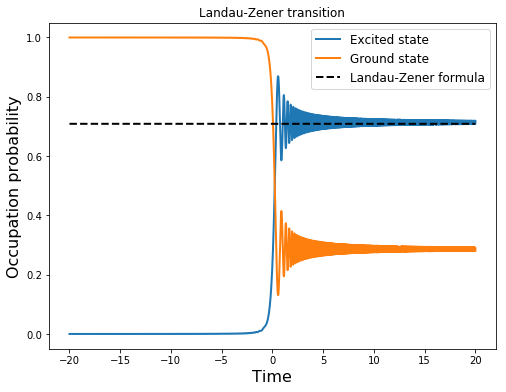

In [4]:
fig = plt.figure(figsize=(8,6))
plt.plot(tlist, p_ex, tlist, 1-p_ex,lw=2)
plt.plot(tlist, 1 - np.exp(-np.pi * Ej **2 / (2 * A)) * np.ones_like(tlist), 'k--',lw=2)
plt.xlabel('Time',fontsize=16)
plt.ylabel('Occupation probability',fontsize=16)
plt.title('Landau-Zener transition')
plt.legend(("Excited state", "Ground state", "Landau-Zener formula"), loc=0,fontsize=12);

## Plot dynamics on Bloch sphere

In [5]:
# Solve
output = qt.mesolve(H, psi0, tlist, [], [sx,sy,sz],
                   progress_bar=True) 

10.0%. Run time:   0.41s. Est. time left: 00:00:00:03
20.0%. Run time:   0.94s. Est. time left: 00:00:00:03
30.0%. Run time:   1.21s. Est. time left: 00:00:00:02
40.0%. Run time:   1.44s. Est. time left: 00:00:00:02
50.0%. Run time:   1.70s. Est. time left: 00:00:00:01
60.0%. Run time:   1.91s. Est. time left: 00:00:00:01
70.0%. Run time:   2.16s. Est. time left: 00:00:00:00
80.0%. Run time:   2.42s. Est. time left: 00:00:00:00
90.0%. Run time:   2.66s. Est. time left: 00:00:00:00
Total run time:   2.94s


In [6]:
import matplotlib as mpl
nrm=mpl.colors.Normalize(-1,20)
colors=mpl.cm.magma(nrm(tlist))

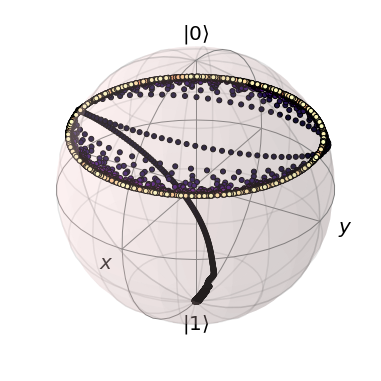

In [7]:
B = qt.Bloch()
B.add_points(output.expect,'m')
B.point_color=list(colors)
B.show()